In [ ]:
# 내일은 4시까지 회의, 수업 종료 1시간 전?에 프로젝트 계획서 작성하여 제출할 예정임
# 신경망 구성에서 연속형 값은 linear, 이진 분류면 sigmoid, 다중분류는 softmax 이렇게 가면 좋다고 하심

https://keras.io/ 케라스 코드를 확인하는 용도(API docs를 확인)

https://thebook.io/080324/0157/ 해당 설명 및 코드와 동일

In [2]:
# 당뇨병 데이터
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('DL_data/data/pima-indians-diabetes3.csv')
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [8]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


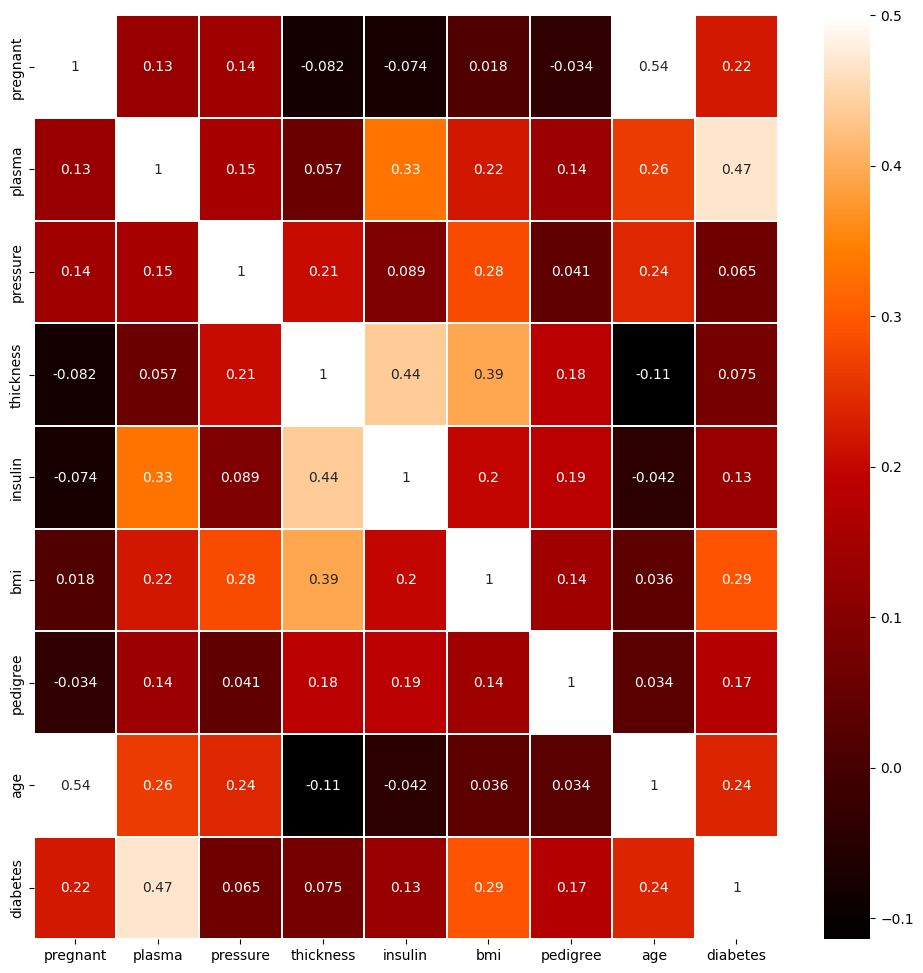

In [13]:
# 데이터 간의 상관 관계를 그래프로 표현해 봅니다.
colormap = plt.cm.gist_heat   #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))   #그래프의 크기를 정합니다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [15]:
df.diabetes == 0

0      False
1       True
2      False
3       True
4      False
       ...  
763     True
764     True
765     True
766    False
767     True
Name: diabetes, Length: 768, dtype: bool

In [16]:
df.plasma[df.diabetes==0]

1       85
3       89
5      116
7      115
10     110
      ... 
762     89
763    101
764    122
765    121
767     93
Name: plasma, Length: 500, dtype: int64

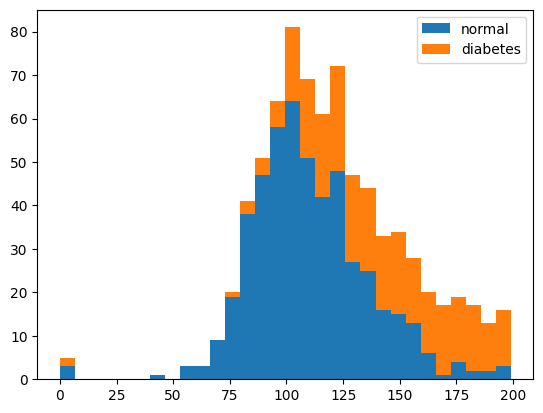

In [17]:
#plasma를 기준으로 각각 정상과 당뇨가 어느 정도 비율로 분포하는지 살펴봅니다. 
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.legend()

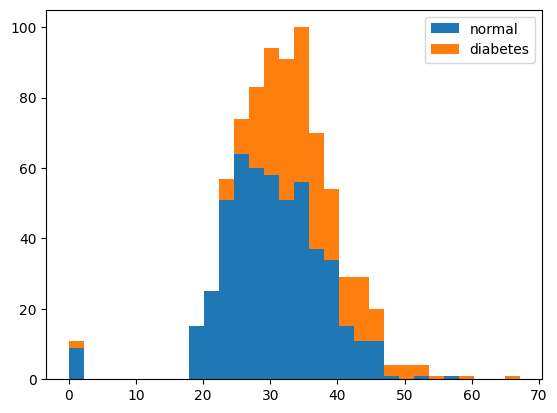

In [18]:
#BMI를 기준으로 각각 정상과 당뇨가 어느 정도 비율로 분포하는지 살펴봅니다. 
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.legend()

In [19]:
# 세부 정보를 X로 지정합니다.
X = df.iloc[:,0:8]
# 당뇨병 여부를 Y로 지정합니다.
y = df.iloc[:,8]

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [30]:
model = Sequential()

In [31]:
model.add(Dense(16, input_dim=8, activation='relu', name='Input_layer')) # 레이어의 이름 지정 가능
model.add(Dense(8, activation='relu', name='hidden_layer'))
model.add(Dense(1, activation='sigmoid', name='output_layer'))

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 16)                144       
                                                                 
 hidden_layer (Dense)        (None, 8)                 136       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
history = model.fit(X,y, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 3s 3ms/step - loss: 10.1656 - accuracy: 0.6029
Epoch 2/100
154/154 [==============================] - 0s 3ms/step - loss: 1.9047 - accuracy: 0.6042
Epoch 3/100
154/154 [==============================] - 0s 3ms/step - loss: 1.1938 - accuracy: 0.6406
Epoch 4/100
154/154 [==============================] - 0s 3ms/step - loss: 0.9933 - accuracy: 0.6445
Epoch 5/100
154/154 [==============================] - 0s 3ms/step - loss: 0.9682 - accuracy: 0.6536
Epoch 6/100
154/154 [==============================] - 0s 3ms/step - loss: 0.9148 - accuracy: 0.6393
Epoch 7/100
154/154 [==============================] - 0s 3ms/step - loss: 0.8616 - accuracy: 0.6536
Epoch 8/100
154/154 [==============================] - 0s 3ms/step - loss: 0.7525 - accuracy: 0.6641
Epoch 9/100
154/154 [==============================] - 0s 3ms/step - loss: 0.8291 - accuracy: 0.6445
Epoch 10/100
154/154 [==============================] - 0s 3ms/step - loss: 0.7906 - accur

In [ ]:
history.history

In [64]:
df = pd.read_csv('DL_data/data/iris3.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


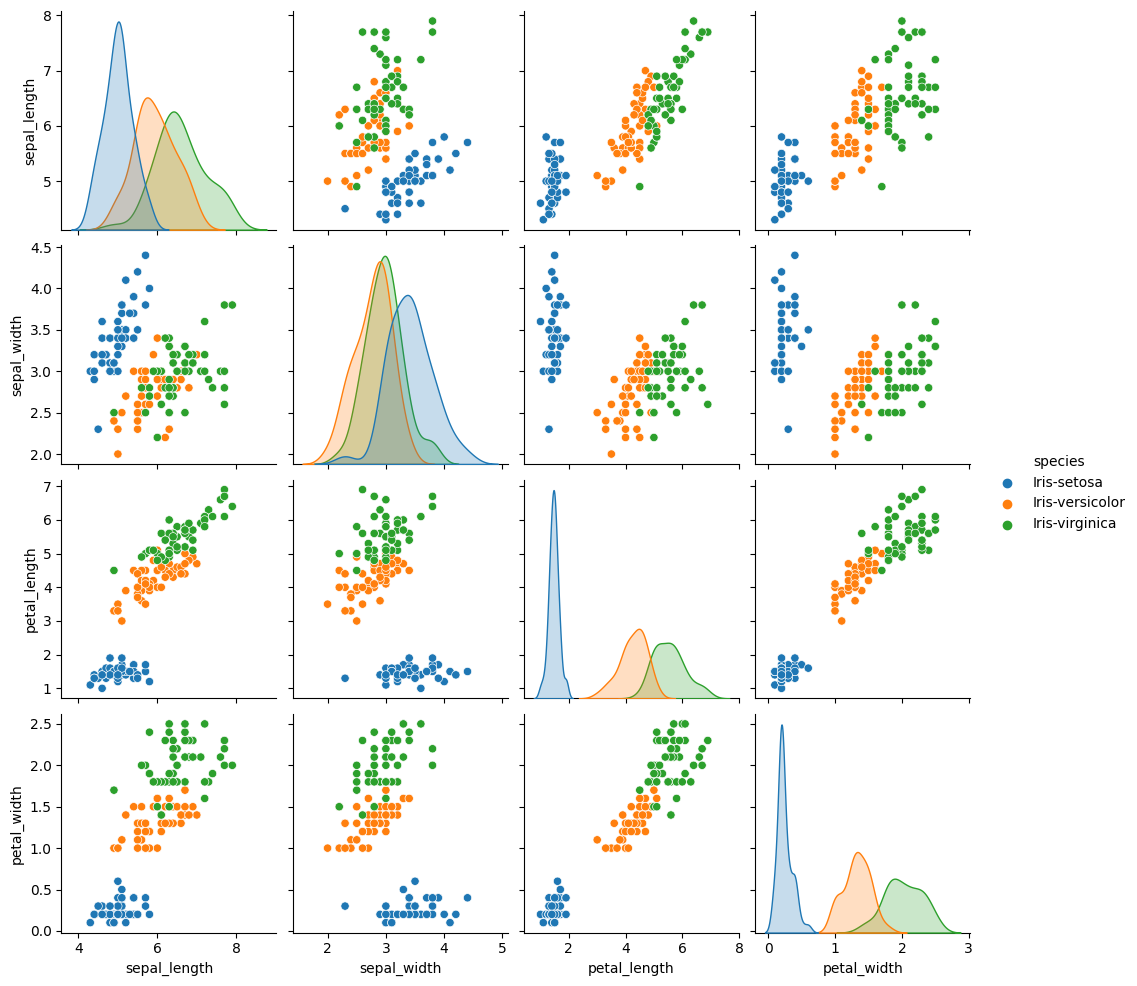

In [42]:
sns.pairplot(df, hue='species')
# 이 그림으로 어떤 방법으로 분류할 것인지 육안으로 확인하기 쉬워짐
# 예시로 sepal_width와 sepal_length는 섞인 데이터가 많으므로 분류모델을 만들기에는 부적합해보임
# 반면 petal_length와 speal_length는 꽤 구분이 잘 지어져 있으므로 분류하기 적합한 열의 조합임

In [43]:
# 속성을 X, 클래스를 y로 저장합니다.
X = df.iloc[:,0:4]
y = df.iloc[:,4]

In [44]:
# X와 y의 첫 5줄을 출력해 보겠습니다. 
print(X[0:5])
print(y[0:5])

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [63]:
# 원-핫 인코딩 처리를 합니다.
y = pd.get_dummies(y)
y.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [57]:
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [58]:
model.summary()
# 파라미터 값 계산은 각각 다음과 같음
# 16*4 + 16
# 16*8 + 8
# 8*3 + 3
# 라마3의 70B 사이즈는 700억 파라미터라는 의미임
# 추후에 다뤄볼 파인튜닝을 하기 위한 bert는 구글ai에서 개발한 모델임

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                80        
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


https://www.aitimes.com/news/articleView.html?idxno=154909
ms의 재밌는 모델 발전

In [59]:
history = model.fit(X, y, epochs=30, batch_size=5)

Epoch 1/30
30/30 [==============================] - 1s 8ms/step - loss: 1.5092 - accuracy: 0.3333
Epoch 2/30
30/30 [==============================] - 0s 7ms/step - loss: 1.2007 - accuracy: 0.2667
Epoch 3/30
30/30 [==============================] - 0s 3ms/step - loss: 1.0851 - accuracy: 0.4600
Epoch 4/30
30/30 [==============================] - 0s 3ms/step - loss: 1.0570 - accuracy: 0.3267
Epoch 5/30
30/30 [==============================] - 0s 3ms/step - loss: 1.0066 - accuracy: 0.3400
Epoch 6/30
30/30 [==============================] - 0s 2ms/step - loss: 0.9749 - accuracy: 0.4267
Epoch 7/30
30/30 [==============================] - 0s 2ms/step - loss: 0.9298 - accuracy: 0.4467
Epoch 8/30
30/30 [==============================] - 0s 2ms/step - loss: 0.8879 - accuracy: 0.6533
Epoch 9/30
30/30 [==============================] - 0s 2ms/step - loss: 0.8413 - accuracy: 0.7267
Epoch 10/30
30/30 [==============================] - 0s 2ms/step - loss: 0.7988 - accuracy: 0.7000
Epoch 11/30
30/30 [

In [67]:
# 광석인지 암석인지 분류하는 데이터
df = pd.read_csv('DL_data/data/sonar3.csv', header=None)
df.head() # 마지막 열이 0이면 암석, 1이면 광석

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [68]:
df[60].value_counts()

1    111
0     97
Name: 60, dtype: int64

In [69]:
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [70]:
model = Sequential()
model.add(Dense(32, input_dim = 60, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [71]:
history = model.fit(X,y,epochs=200, batch_size=10)

Epoch 1/200
21/21 [==============================] - 1s 11ms/step - loss: 0.6870 - accuracy: 0.5529
Epoch 2/200
21/21 [==============================] - 0s 7ms/step - loss: 0.6645 - accuracy: 0.5865
Epoch 3/200
21/21 [==============================] - 0s 4ms/step - loss: 0.6528 - accuracy: 0.6058
Epoch 4/200
21/21 [==============================] - 0s 4ms/step - loss: 0.6438 - accuracy: 0.6106
Epoch 5/200
21/21 [==============================] - 0s 3ms/step - loss: 0.6320 - accuracy: 0.6394
Epoch 6/200
21/21 [==============================] - 0s 4ms/step - loss: 0.6153 - accuracy: 0.6635
Epoch 7/200
21/21 [==============================] - 0s 4ms/step - loss: 0.6058 - accuracy: 0.6779
Epoch 8/200
21/21 [==============================] - 0s 3ms/step - loss: 0.5806 - accuracy: 0.6827
Epoch 9/200
21/21 [==============================] - 0s 3ms/step - loss: 0.5552 - accuracy: 0.7692
Epoch 10/200
21/21 [==============================] - 0s 4ms/step - loss: 0.5375 - accuracy: 0.7404
Epoch 11

In [73]:
# sonar 데이터를 train/test 분리
# train 데이터로 모델링
# test 데이터로 모델 평가

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=625)
# shuffle은 데이터를 섞는 것이므로 반드시 사용하는 것을 추천
# random_state가 있어야 검증하기 쉬움. 
# 검증이라는 것은 모델이 어느정도의 정확도를 갖는지 평가하기 위해서 하는 것임
# 근데 이에 대해서 매번 평가 데이터가 달라지면 안되기 때문에 random_state도 적용하는 것이 좋음

In [85]:
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [86]:
history=model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
15/15 [==============================] - 0s 8ms/step - loss: 0.7006 - accuracy: 0.5241
Epoch 2/200
15/15 [==============================] - 0s 9ms/step - loss: 0.6910 - accuracy: 0.5241
Epoch 3/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6843 - accuracy: 0.5241
Epoch 4/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.5241
Epoch 5/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.5931
Epoch 6/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6651 - accuracy: 0.5379
Epoch 7/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6598 - accuracy: 0.5448
Epoch 8/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6454 - accuracy: 0.5931
Epoch 9/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.6552
Epoch 10/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6300 - accuracy: 0.7172
Epoch 11/

In [89]:
model.predict(X_test) # 소수점으로 출력됨
y_test[:5] # 0,1중 하나임

147    1
66     0
151    1
114    1
103    1
Name: 60, dtype: int64

In [90]:
score = model.evaluate(X_test, y_test)
score

2/2 [==============================] - 0s 5ms/step - loss: 0.6200 - accuracy: 0.8254


[0.6199830174446106, 0.8253968358039856]

In [92]:
print('테스트 정확도:', score[1])

테스트 정확도: 0.8253968358039856


In [93]:
# 모델 저장
model.save('my_model.hdf5') # 주로 hdf5 or h5 라는 확장자를 줌

In [ ]:
# 모델(변수) 제거
# del model

In [98]:
from tensorflow.keras.models import load_model
model = load_model('my_model.hdf5')

In [101]:
model.predict(X_test)

array([[1.0000000e+00],
       [1.2300360e-03],
       [3.0842564e-01],
       [9.9043405e-01],
       [9.2243719e-01],
       [9.9902177e-01],
       [5.4106630e-02],
       [2.7030070e-05],
       [9.9900740e-01],
       [9.3085147e-02],
       [2.7819171e-03],
       [6.6827168e-04],
       [6.3659251e-01],
       [5.9888440e-01],
       [4.1884864e-03],
       [9.1151738e-01],
       [9.9422139e-01],
       [3.3929437e-01],
       [1.0000000e+00],
       [9.9997747e-01],
       [1.2019289e-03],
       [9.9999690e-01],
       [6.6575676e-02],
       [2.5725255e-02],
       [9.9999583e-01],
       [1.1597819e-03],
       [9.9998760e-01],
       [9.9755931e-01],
       [9.9999988e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9729937e-01],
       [2.7503935e-03],
       [9.6840781e-01],
       [1.0000000e+00],
       [9.9703228e-01],
       [6.6998100e-04],
       [6.6858286e-04],
       [3.6767179e-01],
       [1.7826045e-03],
       [5.9791189e-01],
       [9.999982

In [100]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.6200 - accuracy: 0.8254


[0.6199830174446106, 0.8253968358039856]

In [102]:
# kfold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [104]:
k = 5
kfold = KFold(n_splits=k, shuffle=True) # 분할 전에 샘플이 치우치지 않도록 셔플
acc_score = [] # 정확도 리스트

In [106]:
def model_fn():
    model = Sequential() #딥러닝 모델의 구조를 시작합니다.
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [107]:
#K겹 교차 검증을 이용해 k번의 학습을 실행합니다. 
for train_index , test_index in kfold.split(X):  # for문에 의해서 k번 반복합니다. spilt()에 의해 k개의 학습셋, 테스트셋으로 분리됩니다.
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]  
    y_train , y_test = y.iloc[train_index], y.iloc[test_index]

    model = model_fn()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history=model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0) 
    
    accuracy = model.evaluate(X_test, y_test)[1]  #정확도를 구합니다.
    acc_score.append(accuracy)  #정확도 리스트에 저장합니다.

2/2 [==============================] - 0s 6ms/step - loss: 0.9852 - accuracy: 0.8049


In [109]:
# 이해를 위한 코드 출력
for train_index , test_index in kfold.split(X):  # for문에 의해서 k번 반복합니다. spilt()에 의해 k개의 학습셋, 테스트셋으로 분리됩니다.
    print(train_index)
    print('='*50)
    print(test_index)
    print('='*50)

[  0   1   2   4   5   7   8   9  10  12  13  14  15  16  17  18  19  20
  21  23  24  25  26  27  29  30  31  32  33  35  36  38  39  40  41  42
  44  45  46  47  48  49  50  51  52  53  55  57  58  60  61  62  63  65
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  82  83  84  85
  86  88  89  90  91  92  95  96  98  99 100 101 102 103 104 105 106 107
 108 110 112 114 115 116 117 118 119 120 121 124 126 127 128 130 131 132
 133 134 135 137 138 139 140 141 142 144 145 147 148 150 151 152 153 154
 156 158 159 160 161 163 164 165 166 167 168 172 173 174 176 177 178 179
 181 183 184 185 187 188 190 191 192 193 194 195 196 197 198 199 200 201
 204 205 206 207]
[  3   6  11  22  28  34  37  43  54  56  59  64  66  81  87  93  94  97
 109 111 113 122 123 125 129 136 143 146 149 155 157 162 169 170 171 175
 180 182 186 189 202 203]
[  0   1   2   3   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  30  31  32  33  34  37  38  40  41
  42  4

In [110]:
avg_acc = sum(acc_score)/k
avg_acc # 평균 점수

0.8459930300712586

In [ ]:
# 오후는 모델 생성 과정에서 중간 종료가 필요하다던지..
# 모델 생성에서는 add에 몇개의 유닛, 몇개의 레이어를 사용할 것인지를 생각해봐야 함
# 파인 튜닝은 기존의 모델에 추가 학습을 진행해서 성능을 개선하는 것임

# 프로젝트 주제는 대부분 분류 아니면 예측에 가까울 것임.
# 자연어 처리에서는 텍스트 생성 예를 들어 다음 단어를 예측하고 생성하는 것. 이런 것들도 예측 및 분류에 속하게 됨
# 생성형 ai는 예측모델인가?? 이것도 예측 및 분류 동시에 사용하는 모델임(굳이 말하자면 예측이 가까움)

In [153]:
df = pd.read_csv('DL_data/data/wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [121]:
df.iloc[:,12].value_counts()

0    4898
1    1599
Name: 12, dtype: int64

In [129]:
X = df.iloc[:,:12]
y = df.iloc[:,12]

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [131]:
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 30)                390       
                                                                 
 dense_28 (Dense)            (None, 12)                372       
                                                                 
 dense_29 (Dense)            (None, 8)                 104       
                                                                 
 dense_30 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [132]:
#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 전체자료 100건
# train 80건 test 20건
# train 60% validation 40%
# 80*0.6=48, 80*0.4=32
# 48건의 학습 데이터로 모델을 만들면서 32건의 검증 데이터로 모델에 대한 평가(파라미터 최적화)

In [134]:
# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2

Epoch 1/50
7/7 [==============================] - 1s 42ms/step - loss: 21.8303 - accuracy: 0.2419 - val_loss: 17.4485 - val_accuracy: 0.2392
Epoch 2/50
7/7 [==============================] - 0s 9ms/step - loss: 14.7418 - accuracy: 0.2419 - val_loss: 10.8398 - val_accuracy: 0.2392
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 8.3139 - accuracy: 0.2419 - val_loss: 4.7247 - val_accuracy: 0.2401
Epoch 4/50
7/7 [==============================] - 0s 9ms/step - loss: 2.3680 - accuracy: 0.3446 - val_loss: 0.4627 - val_accuracy: 0.7977
Epoch 5/50
7/7 [==============================] - 0s 10ms/step - loss: 0.4426 - accuracy: 0.8405 - val_loss: 0.5000 - val_accuracy: 0.8478
Epoch 6/50
7/7 [==============================] - 0s 10ms/step - loss: 0.5254 - accuracy: 0.8516 - val_loss: 0.5466 - val_accuracy: 0.8505
Epoch 7/50
7/7 [==============================] - 0s 10ms/step - loss: 0.5098 - accuracy: 0.8607 - val_loss: 0.4743 - val_accuracy: 0.8619
Epoch 8/50
7/7 [=========

위 결과에서 val 정확도와 train정확도의 차이가 너무 크면 과적합으로 볼 수 있음

In [ ]:
# 모델 생성 과정에 50회의 학습을 진행했는데 만들어질 때마다 파일로 저장하고 싶을 수 있음
from tensorflow.keras.callbacks import ModelCheckpoint
modelpath = "saved_h5/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])

In [137]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

61/61 [==============================] - 1s 8ms/step - loss: 0.0765 - accuracy: 0.9754
Test accuracy: 0.9753845930099487


In [138]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라 시간이 다소 걸릴수 있습니다)
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

In [146]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [154]:
# history에 저장된 학습 결과를 확인해 보겠습니다. 
hist_df=pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.035237,0.989736,0.085491,0.983289
1,0.029008,0.992082,0.084674,0.985048
2,0.029303,0.992962,0.085713,0.986807
3,0.030682,0.990909,0.085951,0.985048
4,0.031397,0.990029,0.092806,0.985048


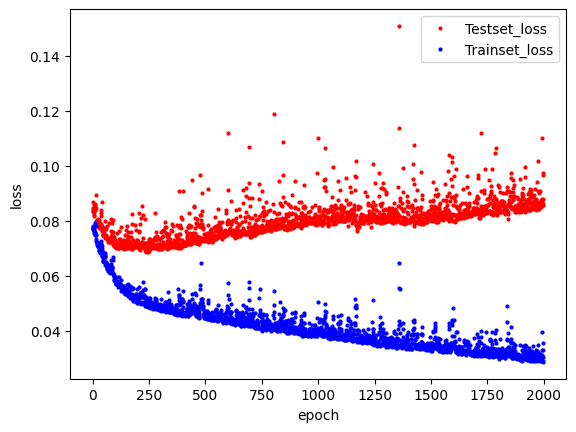

In [140]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [147]:
# 몇 에폭만큼 학습해야 될지에 대해서 알기 위해서 위 그림에서 떨어다가 올라가는데, 올라가기 직전에 끊어야함
# 위 상황에서는 나는 100에폭이 좋을 거 같은데 강사님은 250~300정도가 적합한 거 같다고 하심
# 이제 early stopping(조기 종료)을 해줄 필요가 있음

In [148]:
from tensorflow.keras.callbacks import EarlyStopping

In [149]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20) 
# patience는 참는다는 것이며 20회 연속 val loss가 안 내려가는 것을 참는 것임(근데 20은 살짝 큼)
# loss가 작다는 것은 실제 값과 많이 일치(유사)하단 것임
# 정확히 하자면 최저값의 val_loss가 아닌 가다가 현재보다 낮은 로스값이 등장하면 patience가 초기화됨

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=500, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/500
7/7 [==============================] - 0s 30ms/step - loss: 0.0352 - accuracy: 0.9897 - val_loss: 0.0855 - val_accuracy: 0.9833
Epoch 2/500
7/7 [==============================] - 0s 17ms/step - loss: 0.0290 - accuracy: 0.9921 - val_loss: 0.0847 - val_accuracy: 0.9850
Epoch 3/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0293 - accuracy: 0.9930 - val_loss: 0.0857 - val_accuracy: 0.9868
Epoch 4/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0307 - accuracy: 0.9909 - val_loss: 0.0860 - val_accuracy: 0.9850
Epoch 5/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0314 - accuracy: 0.9900 - val_loss: 0.0928 - val_accuracy: 0.9850
Epoch 6/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0338 - accuracy: 0.9894 - val_loss: 0.0920 - val_accuracy: 0.9859
Epoch 7/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0363 - accuracy: 0.9883 - val_loss: 0.0923 - val_accuracy: 0.9842
Epoch 8/500
7/7 [====

https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

https://www.kaggle.com/c/house-prices-advanced-regression-techniques
데이터셋 정보


In [155]:
df = pd.read_csv('DL_data/data/house_train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [157]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [165]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [168]:
df.shape

(1460, 81)

In [169]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [170]:
df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [173]:
df = pd.get_dummies(df)
df # 접두어는 열이름(SaleType), 접미어는 데이터 이름(New) => SaleType_New

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [174]:
df.mean()

Id                         730.500000
MSSubClass                  56.897260
LotFrontage                 70.049958
LotArea                  10516.828082
OverallQual                  6.099315
                             ...     
SaleCondition_AdjLand        0.002740
SaleCondition_Alloca         0.008219
SaleCondition_Family         0.013699
SaleCondition_Normal         0.820548
SaleCondition_Partial        0.085616
Length: 290, dtype: float64

In [176]:
#결측치를 전체 칼럼의 평균으로 대체하여 채워줍니다. 
df = df.fillna(df.mean())
# 원래는 이러면 안됨;;

In [177]:
#데이터 사이의 상관 관계를 저장합니다.
df_corr=df.corr()

In [180]:
df_corr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,-0.051787,0.126580,-0.023461,-0.089928,-0.021846,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295


In [181]:
df_corr.sort_values('SalePrice', ascending=False)
df_corr_sort=df_corr.sort_values('SalePrice', ascending=False)

In [182]:
#집 값과 관련도가 가장 큰 20개의 속성들을 출력합니다. 
df_corr_sort['SalePrice'].head(20)

SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
FullBath            0.560664
BsmtQual_Ex         0.553105
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
YearRemodAdd        0.507101
KitchenQual_Ex      0.504094
Foundation_PConc    0.497734
MasVnrArea          0.475241
GarageYrBlt         0.470177
Fireplaces          0.466929
ExterQual_Gd        0.452466
ExterQual_Ex        0.451164
BsmtFinType1_GLQ    0.434597
Name: SalePrice, dtype: float64

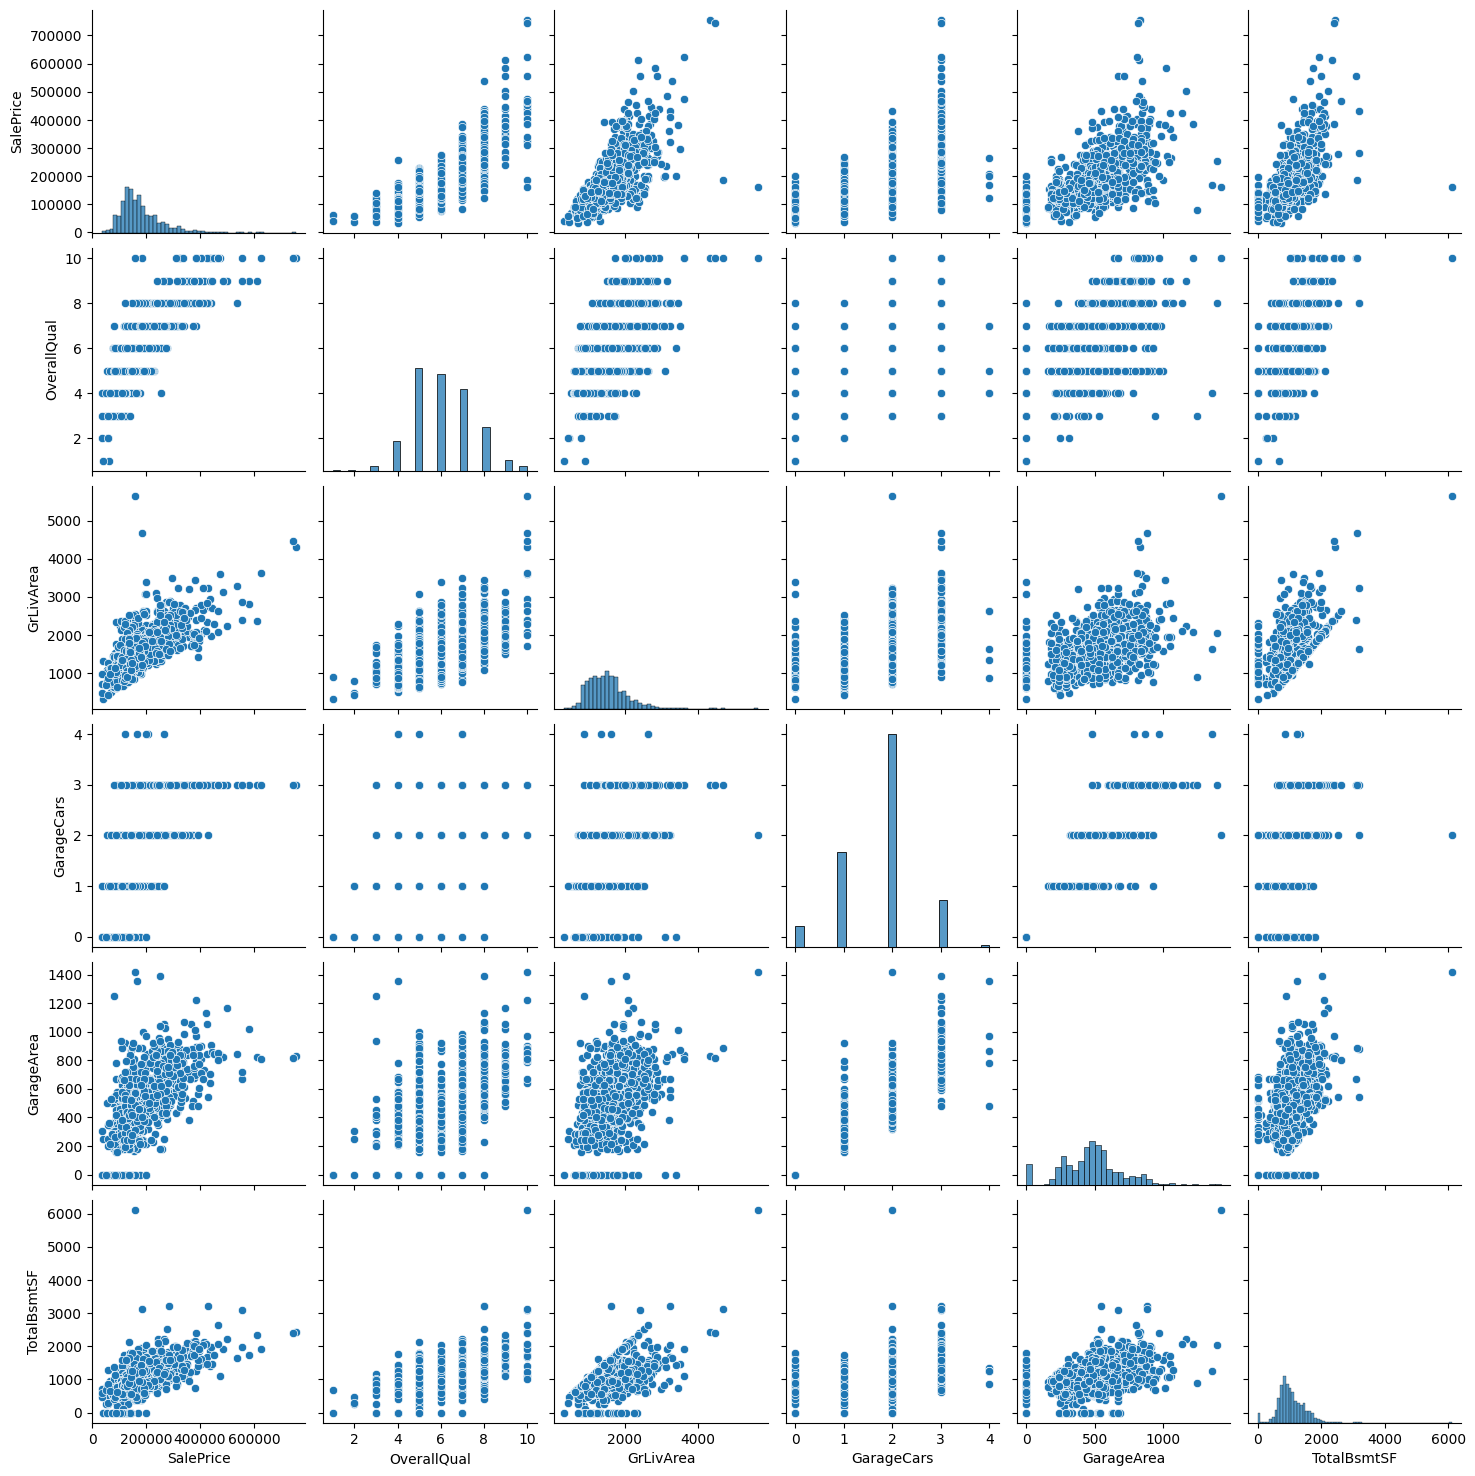

In [183]:
#집 값과 관련도가 가장 높은 속성들을 추출해서 상관도 그래프를 그려봅니다.
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
sns.pairplot(df[cols])

위 그림 해석방법은

우리가 관심을 가지는 그림(SalePrice)를 보고 우상향의 그림을 보여주는 것을 확인하면 됨(양의 상관관계)


In [184]:
#집 값을 제외한 나머지 열을 저장합니다. 
cols_train=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
X_train_pre = df[cols_train]

#집 값을 저장합니다.
y = df['SalePrice'].values

In [185]:
#전체의 80%를 학습셋으로, 20%를 테스트셋으로 지정합니다.
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [187]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1)) # default=linear(예측값이 연속값이므로 그대로 사용)

In [188]:
#모델을 실행합니다.
model.compile(optimizer ='adam', loss = 'mean_squared_error')

# 20회 이상 결과가 향상되지 않으면 자동으로 중단되게끔 합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 모델의 이름을 정합니다.
modelpath="./data/model/Ch15-house.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#실행 관련 설정을 하는 부분입니다. 전체의 20%를 검증셋으로 설정합니다. 
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
28/28 [==============================] - 1s 16ms/step - loss: 39533268992.0000 - val_loss: 36373938176.0000
Epoch 2/2000
28/28 [==============================] - 0s 4ms/step - loss: 38926544896.0000 - val_loss: 35622576128.0000
Epoch 3/2000
28/28 [==============================] - 0s 5ms/step - loss: 37907976192.0000 - val_loss: 34330316800.0000
Epoch 4/2000
28/28 [==============================] - 0s 4ms/step - loss: 36093399040.0000 - val_loss: 31990222848.0000
Epoch 5/2000
28/28 [==============================] - 0s 4ms/step - loss: 32744601600.0000 - val_loss: 27650971648.0000
Epoch 6/2000
28/28 [==============================] - 0s 4ms/step - loss: 27038412800.0000 - val_loss: 21171478528.0000
Epoch 7/2000
28/28 [==============================] - 0s 4ms/step - loss: 19391887360.0000 - val_loss: 13195369472.0000
Epoch 8/2000
28/28 [==============================] - 0s 5ms/step - loss: 11190312960.0000 - val_loss: 6238640640.0000
Epoch 9/2000
28/28 [====================

In [189]:
# 예측 값과 실제 값, 실행 번호가 들어갈 빈 리스트를 만듭니다.
real_prices =[]
pred_prices = []
X_num = []

# 25개의 샘플을 뽑아 실제 값, 예측 값을 출력해 봅니다. 
n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

실제가격: 246578.00, 예상가격: 210399.09
실제가격: 271000.00, 예상가격: 250344.38
실제가격: 162000.00, 예상가격: 148070.20
실제가격: 240000.00, 예상가격: 228258.58
실제가격: 184100.00, 예상가격: 153696.12
실제가격: 179000.00, 예상가격: 190163.75
실제가격: 176500.00, 예상가격: 184950.22
실제가격: 269790.00, 예상가격: 214968.67
실제가격: 144000.00, 예상가격: 159024.70
실제가격: 194500.00, 예상가격: 183670.64
실제가격: 175000.00, 예상가격: 187379.20
실제가격: 87000.00, 예상가격: 130897.28
실제가격: 119750.00, 예상가격: 119916.02
실제가격: 221500.00, 예상가격: 247945.23
실제가격: 128500.00, 예상가격: 116479.44
실제가격: 101800.00, 예상가격: 115096.69
실제가격: 137000.00, 예상가격: 123772.71
실제가격: 183500.00, 예상가격: 183420.45
실제가격: 141000.00, 예상가격: 127467.64
실제가격: 284000.00, 예상가격: 251622.05
실제가격: 87500.00, 예상가격: 98488.70
실제가격: 107900.00, 예상가격: 119462.23
실제가격: 120000.00, 예상가격: 116647.42
실제가격: 315000.00, 예상가격: 291349.12
실제가격: 538000.00, 예상가격: 351302.75


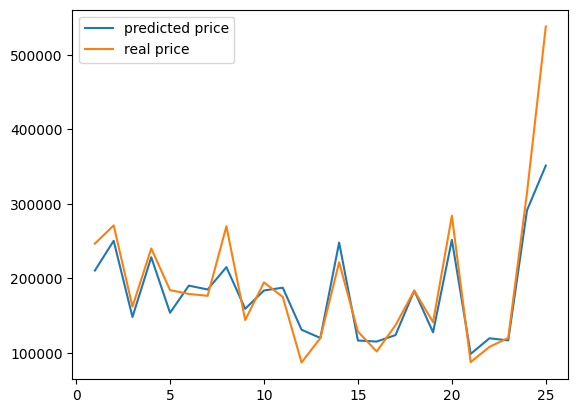

In [191]:
#그래프를 통해 샘플로 뽑은 25개의 값을 비교해 봅니다.

plt.plot(X_num, pred_prices, label='predicted price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()